## Full pipeline prototyping
Notebook for prototyping the full generation pipeline

In [1]:
import sys
sys.path.append("../") # go to parent dir
from pptx_generation.planner import Planner
from pptx_generation.generation import Generator
from htmlrender.renderer import HTMLRenderer
from llm.llmwrapper import LLM


### Initialization

In [2]:
llm1 = LLM(provider="gemini", model="gemini-2.0-flash")
llm2 = LLM(provider="gemini", model="gemini-2.5-flash")
pln, gen = Planner(), Generator()

INFO:root:LLM initialized
INFO:root:Provider: gemini
INFO:root:Model: gemini-2.0-flash
INFO:root:LLM initialized
INFO:root:Provider: gemini
INFO:root:Model: gemini-2.5-flash


### Pipeline

In [3]:
query = "Make a presentation about building a system which takes an internal company database of contract documents, and based on a user query, helps find the most relevant contract document"

In [4]:
pptx_plan = pln.plan_content(query=query, llm_1=llm1)

2025-07-05 22:41:28.236 | INFO     | pptx_generation.planner:brainstorm:25 - PPTX Planning STEP 1: Brainstorming implementation approach based on user query...
                    QUERY: "Make a presentation about building a system which takes an internal company database of contract documents, and based on a user query, helps find the most relevant contract document"

INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-05 22:41:41.492 | INFO     | pptx_generation.planner:brainstorm:35 - PPTX Planning STEP 1: Brainstorming complete!
2025-07-05 22:41:41.495 | INFO     | pptx_generation.planner:outline:70 - PPTX Planning STEP 2: Creating high-level Presentation outline...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://gene

In [5]:
pptx_plan['processed_slide_content']['slide_content']

{'slide_1': '**Title Slide**\n\n*   **Title:** Intelligent Contract Document Search System: A Proposal\n*   **Subtitle:** Unlocking Knowledge and Efficiency Through Semantic Search\n*   **Your Name:** [Your Name]\n*   **Your Title:** Tech Consultant\n*   **Company Logo:** [Company Logo, if applicable]\n*   **Date:** [Date]',
 'slide_2': '**Executive Summary**\n\n*   **Title:** Executive Summary\n*   **Problem:** "Finding relevant contract documents is currently slow, inaccurate, and relies heavily on manual keyword searches, leading to missed information and potential risks."\n*   **Solution:** "We propose an AI-powered semantic search system that understands the *meaning* of contracts and queries, delivering highly relevant results quickly."\n*   **Key Benefits:**\n    *   "Up to 90% Improvement in Search Accuracy"\n    *   "Reduce Contract Retrieval Time by 75%"\n    *   "Minimize Risk of Non-Compliance and Missed Obligations"\n    *   "Empower Employees with Faster Access to Critica

In [6]:
title_slide_content = pptx_plan['processed_slide_content']['slide_content']['slide_1']
print(title_slide_content)

**Title Slide**

*   **Title:** Intelligent Contract Document Search System: A Proposal
*   **Subtitle:** Unlocking Knowledge and Efficiency Through Semantic Search
*   **Your Name:** [Your Name]
*   **Your Title:** Tech Consultant
*   **Company Logo:** [Company Logo, if applicable]
*   **Date:** [Date]


In [7]:
agenda_slide_content = pptx_plan['processed_slide_content']['slide_content']['slide_2']
print(agenda_slide_content)

**Executive Summary**

*   **Title:** Executive Summary
*   **Problem:** "Finding relevant contract documents is currently slow, inaccurate, and relies heavily on manual keyword searches, leading to missed information and potential risks."
*   **Solution:** "We propose an AI-powered semantic search system that understands the *meaning* of contracts and queries, delivering highly relevant results quickly."
*   **Key Benefits:**
    *   "Up to 90% Improvement in Search Accuracy"
    *   "Reduce Contract Retrieval Time by 75%"
    *   "Minimize Risk of Non-Compliance and Missed Obligations"
    *   "Empower Employees with Faster Access to Critical Information"
*   **Call to Action:** "This proposal outlines a plan to transform contract document management, leading to significant cost savings, improved decision-making, and a stronger competitive advantage."


2025-07-05 22:42:54.094 | INFO     | pptx_generation.generation:generate_title_slide:82 - Generating title slide...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-05 22:43:29.974 | INFO     | htmlrender.renderer:renderHTML:12 - Saving rendered HTML image to temp file: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
2025-07-05 22:43:30.018 | INFO     | htmlrender.renderer:renderHTML:26 - Temp file removed: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png


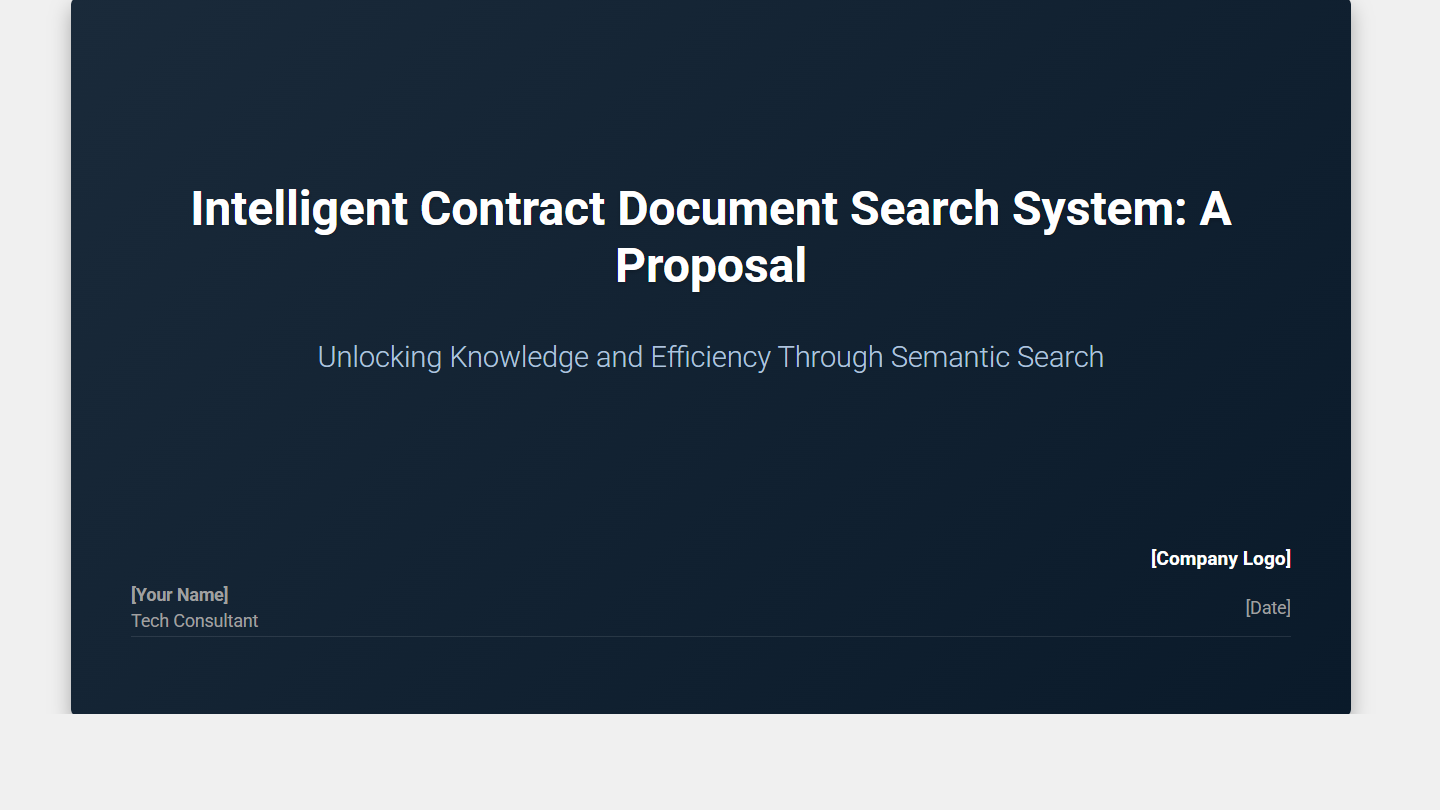

In [8]:
rndr = HTMLRenderer()
title_slide_html = gen.generate_title_slide(query=query, slide_content=title_slide_content, generator_llm=llm2, reviewer_llm=llm2, review=False)
html_img = rndr.renderHTML(html_str=title_slide_html, resize=False)
display(html_img)


2025-07-05 22:43:30.108 | INFO     | pptx_generation.generation:generate_agenda_slide:136 - Generating Agenda slide...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-05 22:44:08.665 | INFO     | htmlrender.renderer:renderHTML:12 - Saving rendered HTML image to temp file: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
2025-07-05 22:44:08.687 | INFO     | htmlrender.renderer:renderHTML:26 - Temp file removed: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png


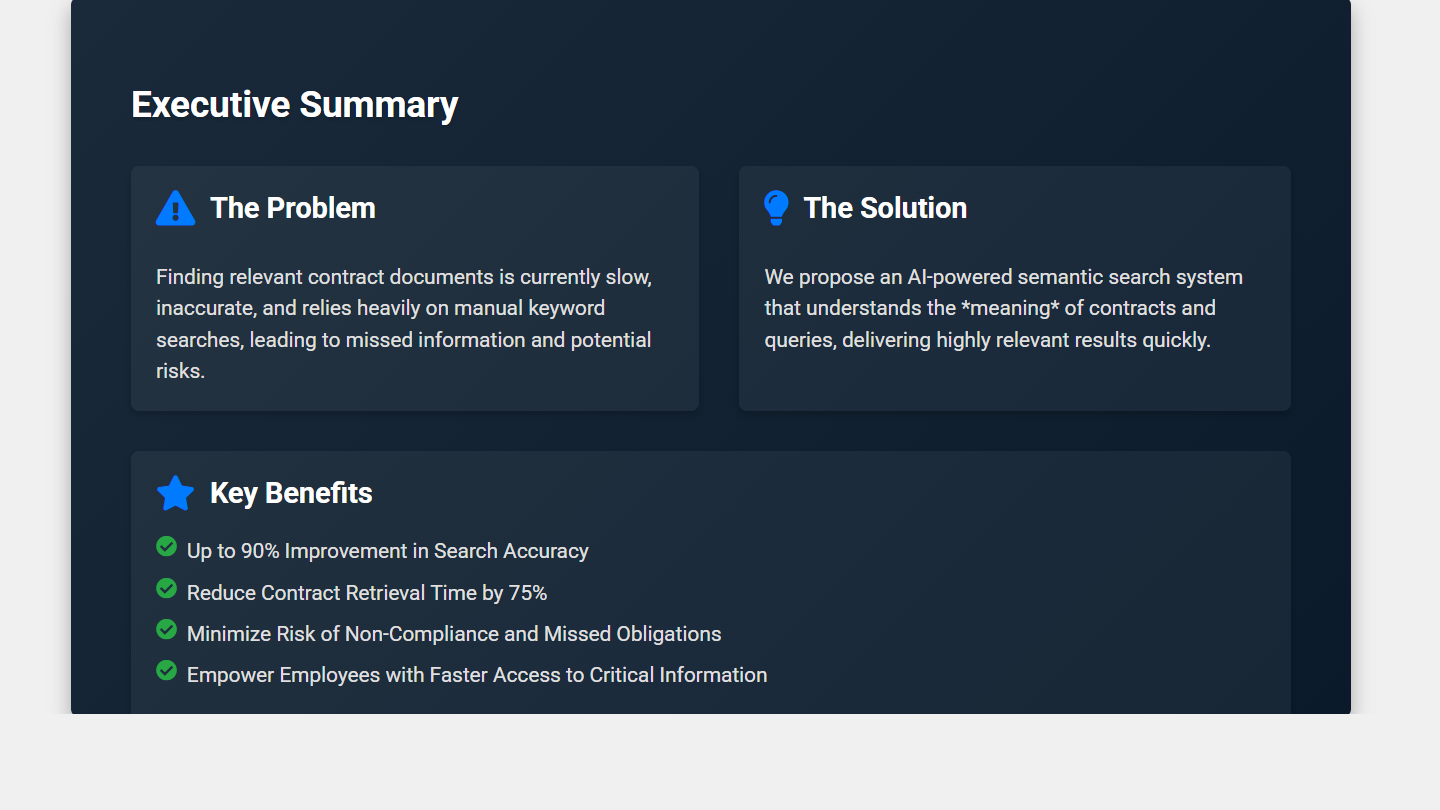

In [9]:
agenda_slide_html = gen.generate_agenda_slide(query=query, slide_content=agenda_slide_content, title_slide_html=title_slide_html, generator_llm=llm2, reviewer_llm=llm2, review=False)
html_img = rndr.renderHTML(html_str=agenda_slide_html, resize=False)
display(html_img)

In [12]:
print(agenda_slide_html)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Executive Summary - Intelligent Contract Document Search System</title>
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;700&display=swap" rel="stylesheet">
    <!-- Font Awesome for icons -->
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.4/css/all.min.css">
    <style>
        /* Base styles for the HTML document */
        body {
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh; /* Ensures the slide is vertically centered on the page */
            background-color: #f0f0f0; /* Light background for the area outside the slide */
            font-family: 'Roboto', sans-serif; /* Modern, clean sans-serif font */
            overflow: hidden; /

### Generating remaining slides

2025-07-05 22:44:48.173 | INFO     | pptx_generation.generation:generate_general_slide:187 - Generating slide...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-05 22:45:25.466 | INFO     | htmlrender.renderer:renderHTML:12 - Saving rendered HTML image to temp file: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
2025-07-05 22:45:25.494 | INFO     | htmlrender.renderer:renderHTML:26 - Temp file removed: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png


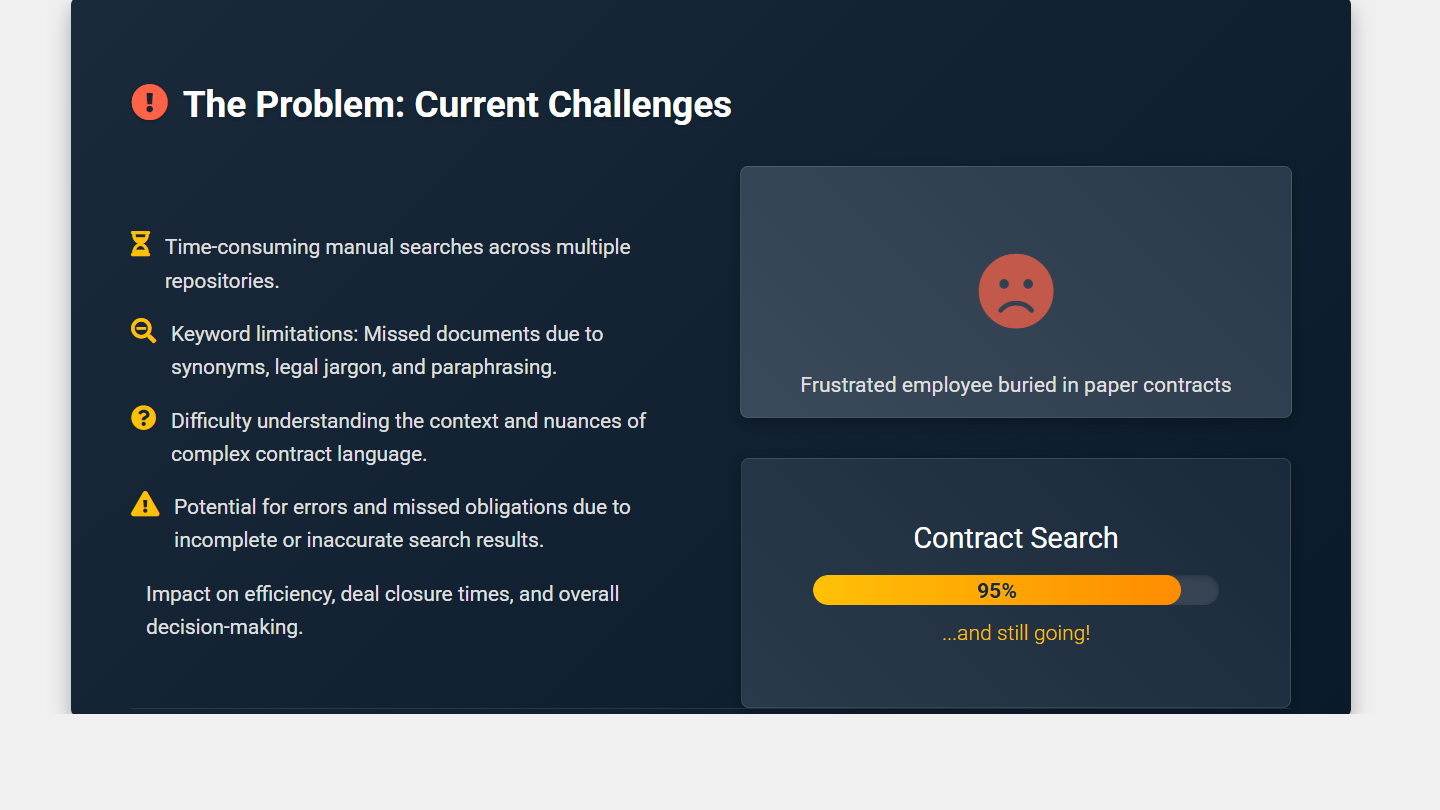

2025-07-05 22:45:25.558 | INFO     | pptx_generation.generation:generate_general_slide:187 - Generating slide...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-05 22:45:44.634 | INFO     | htmlrender.renderer:renderHTML:12 - Saving rendered HTML image to temp file: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
2025-07-05 22:45:44.656 | INFO     | htmlrender.renderer:renderHTML:26 - Temp file removed: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png


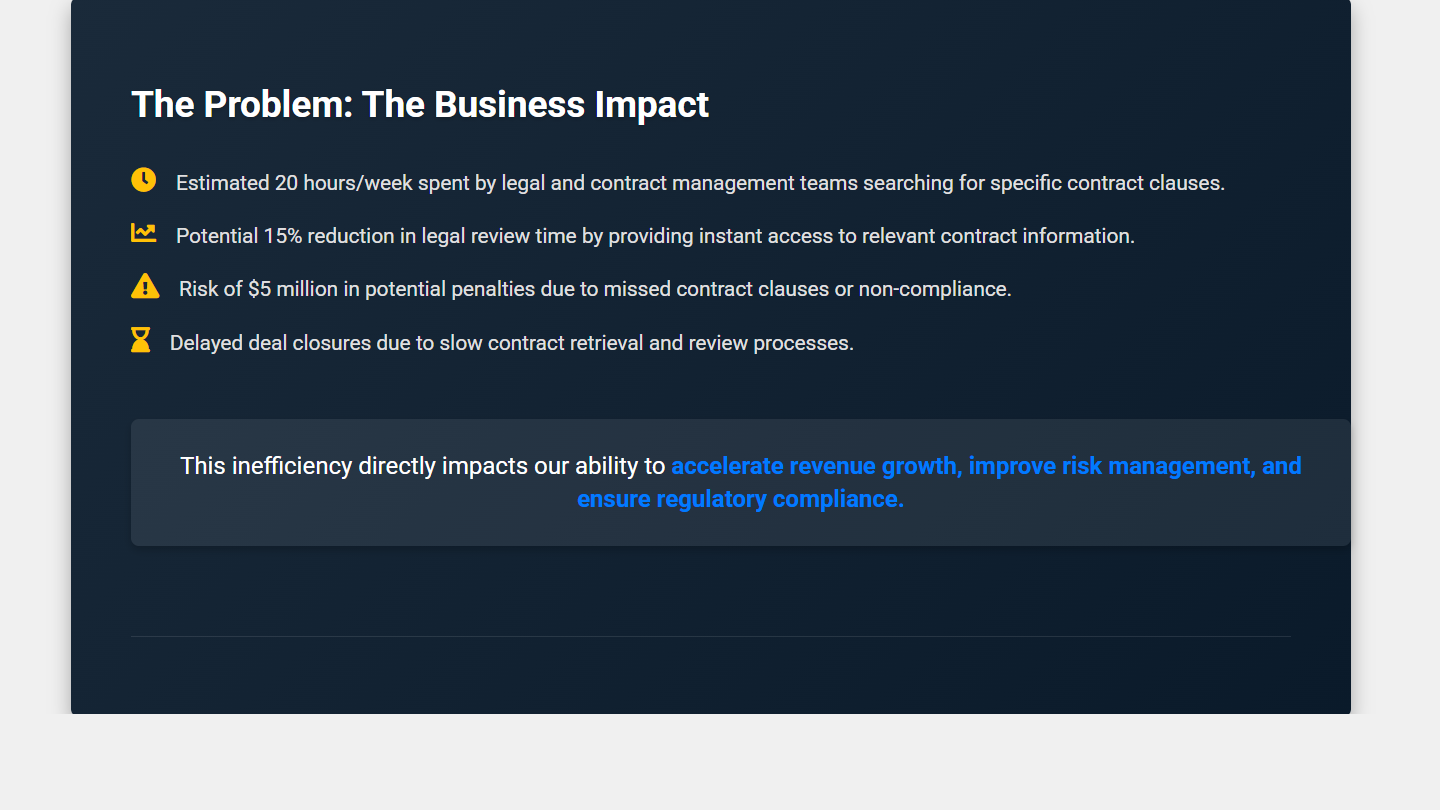

2025-07-05 22:45:44.734 | INFO     | pptx_generation.generation:generate_general_slide:187 - Generating slide...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-05 22:46:18.925 | INFO     | htmlrender.renderer:renderHTML:12 - Saving rendered HTML image to temp file: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
2025-07-05 22:46:18.953 | INFO     | htmlrender.renderer:renderHTML:26 - Temp file removed: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png


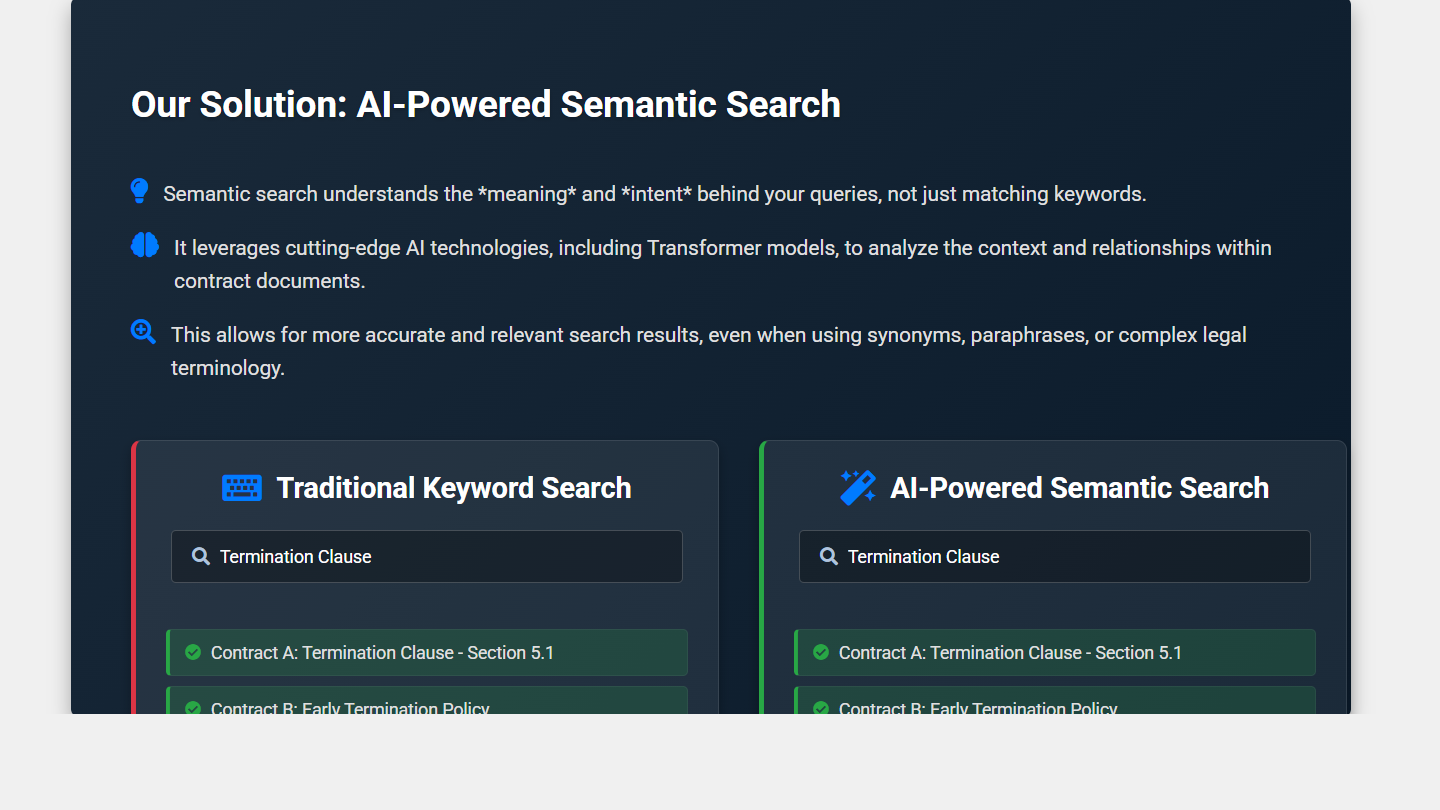

2025-07-05 22:46:19.016 | INFO     | pptx_generation.generation:generate_general_slide:187 - Generating slide...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-05 22:47:41.843 | INFO     | htmlrender.renderer:renderHTML:12 - Saving rendered HTML image to temp file: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
2025-07-05 22:47:41.866 | INFO     | htmlrender.renderer:renderHTML:26 - Temp file removed: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png


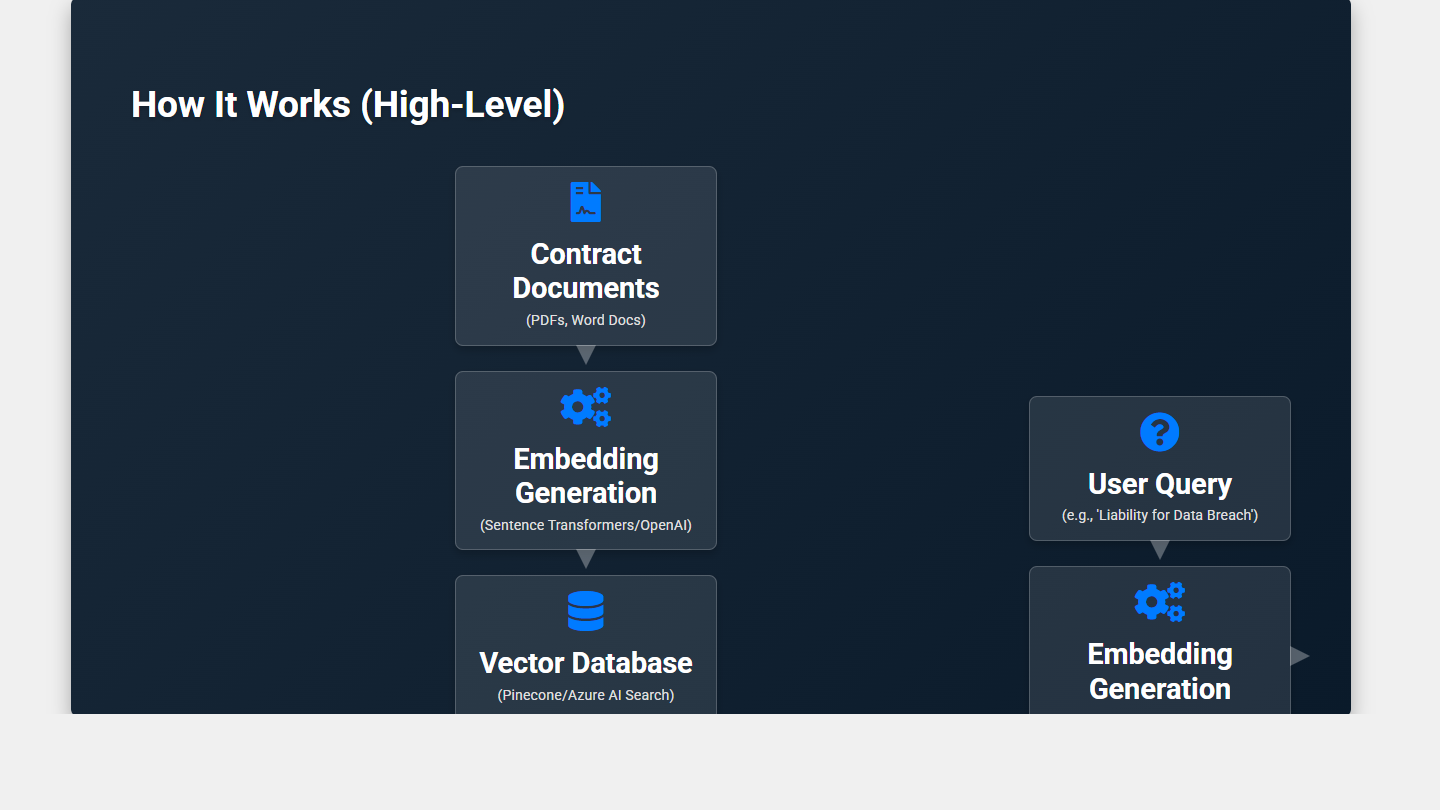

In [10]:
existing_slide_content = []
existing_slide_content = existing_slide_content + [{'name': 'Title slide', 'html' : title_slide_html}]
existing_slide_content = existing_slide_content + [{'name': 'Agenda slide', 'html' : agenda_slide_html}]

final_output = []
for slide in list(pptx_plan['processed_slide_content']['slide_content'].keys())[2:6]:

    slide_content = pptx_plan['processed_slide_content']['slide_content'][slide]
    slide_html = gen.generate_general_slide(query=query, slide_content=slide_content, existing_slide_content=existing_slide_content, generator_llm=llm2, reviewer_llm=llm2, review=False)
    html_img = rndr.renderHTML(html_str=slide_html, resize=False)
    display(html_img)
    final_output = final_output + [{ 'name' : slide, 'html' : slide_html}]

In [11]:
print(final_output[2]['html'])

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Our Solution: AI-Powered Semantic Search</title>
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;700&display=swap" rel="stylesheet">
    <!-- Font Awesome for icons -->
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.4/css/all.min.css">
    <style>
        /* Base styles for the HTML document */
        body {
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh; /* Ensures the slide is vertically centered on the page */
            background-color: #f0f0f0; /* Light background for the area outside the slide */
            font-family: 'Roboto', sans-serif; /* Modern, clean sans-serif font */
            overflow: hidden; /* Prevents scrollbars i

In [22]:
print(title_slide_html)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Intelligent Contract Document Search System: A Proposal</title>
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;700&display=swap" rel="stylesheet">
    <style>
        /* Base styles for the HTML document */
        body {
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh; /* Ensures the slide is vertically centered on the page */
            background-color: #f0f0f0; /* Light background for the area outside the slide */
            font-family: 'Roboto', sans-serif; /* Modern, clean sans-serif font */
            overflow: hidden; /* Prevents scrollbars if the slide perfectly fits the viewport */
        }

        /* Styles for the main slide container */
        .slide-container {
